<a id="segundo"></a>
## 2. Selección de Atributos. 

En esta segunda parte de la tarea estudiaremos un _dataset_ llamado "House Sales in King County", un conjunto de datos de ventas de casas, con diversa información sobre las casas vendidas y los precios de venta. Por la naturaleza variada de las casas y las percepciones de las personas que las compran el problema de predecir el valor de una casa a ser vendida resulta interesante pues si bien muchos supuestos razonables se cumplen la mayoría de las veces (una casa más grande suele costar más que una más chica), la percepción de los compradores puede cambiar mucho por caracteristicas dificiles de medir. 

<img src="https://pngimage.net/wp-content/uploads/2018/06/house-for-sale-sign-png-6.png"  style="height:14cm;"  />

Sin embargo, resulta facil imaginar que algunos de los datos resultan más relevantes que otros al momento de predecir, por esto haremos selección de atributos en esta parte de la pregunta. Este _dataset_ es mucho más limpio que lo usual, por lo cual la exploración inicial sera bastante corta. Luego de explorar los datos deberan realizar una exploración de los distintos atributos para evaluar que tan relevantes son en la predicción del resultado. Puede descargar el _dataset_ desde https://www.kaggle.com/harlfoxem/housesalesprediction donde también encontrará una descripción de las distintas columnas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style()
%matplotlib inline

import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LinearRegression
from sklearn import metrics

import warnings
warnings.filterwarnings('ignore')

#### 2.a Carga de datos 

Cargue los datos a un DataFrame. Transformaremos la columna "date" como indica el siguiente código. Que transformación realiza este código? Elimine las columnas que le parezca pertinente. 

In [2]:
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
print(data.isna().sum())

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64


In [4]:
def to_num(date):
    nums = list(date)
    res = 0
    for i in range(8):
        res = res + int(nums[i])*(10**(7-i))
    return res
data['date'] = data.date.apply(to_num).rank()

In [5]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10544.0,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,13682.5,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,16699.0,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,13682.5,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,16276.0,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### R:

La transformación toma los primeros 8 caracteres de date (en este caso, el año, mes y dia) y los transforma en una representación numerica 

In [6]:
data.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,10807.000000,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,6239.228357,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,34.000000,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,5431.000000,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,10795.500000,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,16198.000000,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,21613.000000,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [7]:
data = data.drop(columns=['id']) #'sqft_living15','sqft_lot15','zipcode'

### R:

En un principio, pensaba eliminar las las variables que estan comentadas anteriormente, pero evaluando si bien zipcode, latitud y longitud entregan informacion redundante, es información de ubicacion geografica que puede aportar al precio de la vivienda

#### 2.b Preprocesamiento de los datos y visualización
Escale los datos de la misma forma que en la pregunta 1. Realice _Scatter plots_ de algunas pares (atributo, precio) que ustedes crean sean más significativos. Comente.

En este caso es recomendable estandarizar "a mano", pues mantener la estructura de DataFrame facilitará el ítem siguiente. En todo caso, puede elegir la opción que prefiera. 

Si la curiosidad, imaginación y tiempo le alcanza pruebe también realizando algunas transformaciones simples (logaritmica, cuadrática, _etc._)

[//]( https://vignette.wikia.nocookie.net/inciclopedia/images/6/6a/Bob_esponja_caja_de_imaginacion.JPG/revision/latest?cb=20081122000821 )

### R:

Estandarizamos a mano para preservar la estructura del dataframe, pero no estandarizamos el precio.

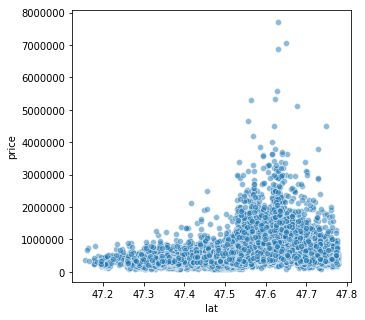

In [8]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='lat',y='price',data=data,alpha=0.5)
plt.show()

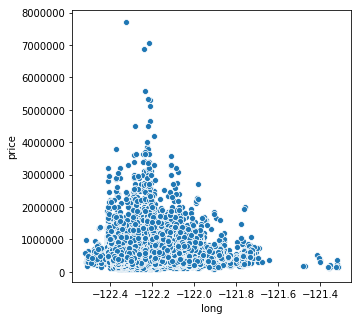

In [9]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='long',y='price',data=data)
plt.show()

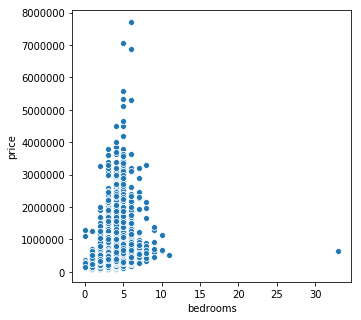

In [10]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='bedrooms',y='price',data=data)
plt.show()

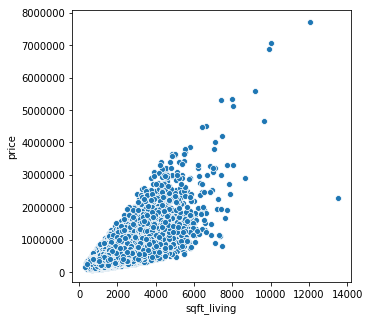

In [11]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='sqft_living',y='price',data=data)
plt.show()

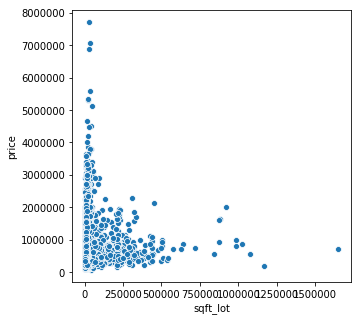

In [12]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='sqft_lot',y='price',data=data)
plt.show()

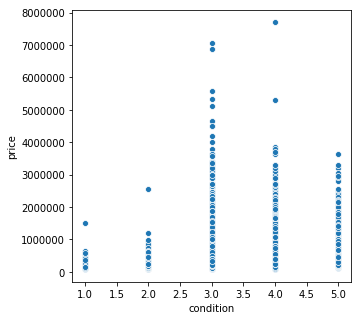

In [13]:
plt.figure(figsize=(5,5))
sns.scatterplot(x='condition',y='price',data=data)
plt.show()

In [14]:
tr_df, val_df = train_test_split(data, test_size=0.25,random_state=7)
columns = data.columns
columns = columns.drop('price')
for col in columns:
    mu = tr_df[col].mean()
    sigma = tr_df[col].std()
    tr_df.loc[:,col] = tr_df.loc[:,col].apply(lambda x: (x - mu)/sigma)
    val_df.loc[:,col] = val_df.loc[:,col].apply(lambda x: (x - mu)/sigma)

In [15]:
tr_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
17178,-1.121351,399950.0,-0.396351,0.500014,0.526157,-0.114231,0.932762,-0.088155,-0.301606,-0.628251,1.135640,0.934470,-0.654241,0.612667,-0.212912,-0.874025,-1.019994,0.002944,0.883923,-0.096956
10619,0.392084,799000.0,0.668357,1.795320,1.305482,0.132472,0.932762,-0.088155,4.967849,-0.628251,1.981033,0.513622,1.750955,0.646556,-0.212912,2.255333,-1.481900,-0.745758,1.468050,0.167089
11724,-0.302841,306000.0,-0.396351,-0.471465,-0.112456,-0.130320,-0.919620,-0.088155,-0.301606,-0.628251,-0.555146,0.225041,-0.654241,0.680444,-0.212912,-0.892764,-1.340722,-0.074752,-0.517984,-0.189735
2366,-1.336338,665000.0,2.797774,1.147667,2.344582,-0.268000,1.858954,-0.088155,-0.301606,0.907231,-0.555146,1.475560,2.110610,-2.335642,-0.212912,0.756239,-0.009304,-0.491482,-0.678619,-0.292908
3512,-1.395154,749950.0,0.668357,0.823840,1.110651,0.518181,0.932762,-0.088155,-0.301606,0.907231,1.135640,1.583778,-0.654241,0.409335,-0.212912,-0.105740,1.272883,0.836403,1.175986,0.872369


#### 2.c Selección de Atributos _by hand_
En esta parte comensaremos entrenando un modelo sin ningun atributo y luego iremos agregando 1 a 1 el atributo que más mejora los resultados de la predicción. En cada paso validaremos qué atributo es el mejor utilizando 5-_fold_ como aprendió en la pregunta anterior. 
Para el modelo sin ningun atributo utilizaremos una predicción constante igual al promedio de los datos de entrenamiento. Luego, en cada iteración, evaluaremos cada uno de los atributos restantes, viendo cual reduce más el error. El error que utilizaremos para esta pregunta sera el MSE o _Mean Square Error_. Luego de elegido un atributo, lo agregamos a la lista de atributos a utilizar y continuamos iterando hasta agotar los atributos restantes. 
Guarde los errores promedio a medida va agregando atributos al modelo y guarde la lista de los atributos que fue agregando, luego grafíque el error promedio en función del nuemero de atributos seleccionado.
Cual es el modelo que entrenga un menor error de validación (cual es su lista de atributos)?

In [16]:
x_tr = tr_df.drop(columns=['price'])
y_tr = tr_df['price']

x_val = val_df.drop(columns=['price'])
y_val = val_df['price']

In [17]:
restantes = list(x_tr.columns)
actuales = []
error_actual = ((y_tr-y_tr.mean())**2).mean()
seed = 7
err = [error_actual]

while restantes:
    folds = KFold(5, random_state=seed)
    error_att = []
    for atributo_candidato in restantes:
        errores = []
        for train_index, val_index in folds.split(x_tr):
            model = LinearRegression()
            model.fit(x_tr[actuales+[atributo_candidato]].iloc[train_index,:], y_tr.values[train_index])
            pred = model.predict(x_tr[actuales+[atributo_candidato]].iloc[val_index,:]) 
            errores.append(metrics.mean_squared_error(y_tr.values[val_index],pred))
        error_att.append(np.mean(errores))
        #print(atributo_candidato, 'MSE:',np.mean(errores),'+/-',np.std(errores))
    print("Seleccionado:{} MSE:{}".format(restantes[error_att.index(np.min(error_att))],np.min(error_att)))
    print("=====")
    actuales.append(restantes[error_att.index(np.min(error_att))])
    restantes.pop(error_att.index(np.min(error_att)))
    err.append(np.min(error_att))

Seleccionado:sqft_living MSE:68104422719.62624
=====
Seleccionado:lat MSE:58043747437.81209
=====
Seleccionado:view MSE:52193434460.86563
=====
Seleccionado:grade MSE:48883808468.38734
=====
Seleccionado:yr_built MSE:44644254499.862656
=====
Seleccionado:waterfront MSE:42163809119.48108
=====
Seleccionado:bedrooms MSE:41783554736.818375
=====
Seleccionado:bathrooms MSE:41378314289.82303
=====
Seleccionado:zipcode MSE:41084390336.88811
=====
Seleccionado:long MSE:40678692682.26486
=====
Seleccionado:condition MSE:40557044231.55385
=====
Seleccionado:sqft_above MSE:40413359703.622894
=====
Seleccionado:date MSE:40285430488.6544
=====
Seleccionado:yr_renovated MSE:40208090886.90934
=====
Seleccionado:sqft_lot15 MSE:40163012252.27802
=====
Seleccionado:sqft_living15 MSE:40135181053.66716
=====
Seleccionado:floors MSE:40113292966.55338
=====
Seleccionado:sqft_basement MSE:40113292966.55339
=====
Seleccionado:sqft_lot MSE:40116688049.00759
=====


In [18]:
actuales[:18]

['sqft_living',
 'lat',
 'view',
 'grade',
 'yr_built',
 'waterfront',
 'bedrooms',
 'bathrooms',
 'zipcode',
 'long',
 'condition',
 'sqft_above',
 'date',
 'yr_renovated',
 'sqft_lot15',
 'sqft_living15',
 'floors',
 'sqft_basement',
 'sqft_lot']

### R: 

el modelo que entrega el menor MSE, corresponde al modelo que tiene $18$ variables, la lista se detalla en la linea anterior 

#### 2.d Validar
Utilizando la lista de atributos que calculó en la pregunta anterior, realice un gráfico de como varía el error de entrenamiento (error sobre `x_tr`) y de validación (sobre `x_val`) a medida va agregando los atributos. Comente como sus hallazgos se relacionan con lo aprendido teóricamente. 

In [19]:
tr_error = []
val_error = []
for i in range(1,len(actuales)+1):
    model = LinearRegression()
    model.fit(x_tr[actuales[:i]], y_tr.values)
    pred_tr = model.predict(x_tr[actuales[:i]])
    pred_val = model.predict(x_val[actuales[:i]])
    #print(model.score(x_tr[actuales[:i]],y_tr.values),model.score(x_val[actuales[:i]],y_val.values))
    err_tr = metrics.mean_squared_error(y_tr.values,pred_tr)
    err_val = metrics.mean_squared_error(y_val.values,pred_val)
    tr_error.append(err_tr)
    val_error.append(err_val)

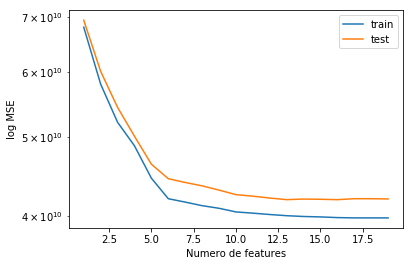

In [20]:
plt.plot(np.arange(1,len(actuales)+1),tr_error)
plt.plot(np.arange(1,len(actuales)+1),val_error)
plt.legend(["train","test"])
plt.yscale('log')
plt.ylabel('log MSE')
plt.xlabel('Numero de features')
plt.show()

### R:

Podemos ver que hasta las 13 features que añadimos, hay una vaha en nuestro conjunto de test (o validación), de ahi en adelante podemos ver que hay una pequeña alza y se mantiene estable mientras el modelo en los datos de train siguen bajando. Esto es una clara muestra que el modelo en train puede estar sobreajustando.

#### 2.e Mutual information
Calcule la Información Mutual para nuestros datos. Note que esta función ya esta implementada.
Que información puede obtener de estos resultados? Concuerdan los datos encontrados con lo encontrado en la pregunta anterior? 

In [21]:
from sklearn.feature_selection import mutual_info_regression
MI = list(zip(mutual_info_regression(x_tr, y_tr),x_tr.columns))

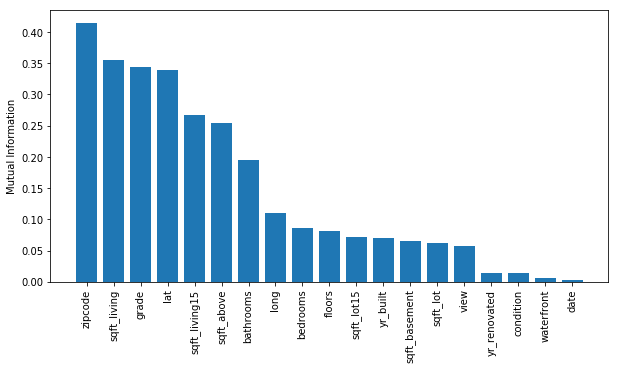

In [22]:
values = np.array([val[0] for val in MI])
features = np.array([val[1] for val in MI])
sort_idx = np.argsort(values)[::-1]
plt.figure(figsize=(10,5))
plt.bar(np.arange(1,len(values)+1),values[sort_idx])
plt.xticks(np.arange(1,len(values)+1), features[sort_idx])
plt.xticks(rotation=90)
plt.ylabel('Mutual Information')
plt.show()

### R:

La informacion mutua nos entrega valores los cuales nos dicen que tanto información entrega una variable con respecto a otra. En este caso, que tanta relacion tienen las variables de entrada con la variable target.

Si bien hay variables con alta MI, las cuales intersectan con nuestra lista de features escogidas (sqft_living, grade y lat), tenemos otras que son escogidas despues. Esto puede ser debido a que la Informacion mutua solo explica entre dos variables sin tener en cuenta posibles correlaciones entre otras variables.

#### 2.f Más variables
Repita lo realizado en la pregunta 2.c (incluyendo gráficos) pero agregando la variable categorica `zipcode` utilizando nuevamente `pd.get_dummies`. Esta vez puede optar por no realizar _K-fold_ si no entrenar una sola vez cada modelo pues podría resultar demasiado demandante en tiempo utilizar _K-fold_, aunque siempre es valorado. 
Qué modelo se comporta mejor y por qué cree que sucede esto? 

In [23]:
np.unique(data['zipcode'],return_counts=True)

(array([98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010,
        98011, 98014, 98019, 98022, 98023, 98024, 98027, 98028, 98029,
        98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, 98042,
        98045, 98052, 98053, 98055, 98056, 98058, 98059, 98065, 98070,
        98072, 98074, 98075, 98077, 98092, 98102, 98103, 98105, 98106,
        98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119,
        98122, 98125, 98126, 98133, 98136, 98144, 98146, 98148, 98155,
        98166, 98168, 98177, 98178, 98188, 98198, 98199]),
 array([362, 199, 280, 317, 168, 498, 141, 283, 100, 195, 124, 190, 234,
        499,  81, 412, 283, 321, 256, 274, 125, 432, 545, 590,  50, 282,
        548, 221, 574, 405, 268, 406, 455, 468, 310, 118, 273, 441, 359,
        198, 351, 105, 602, 229, 335, 266, 186, 109, 269, 583, 330, 553,
        508, 184, 290, 410, 354, 494, 263, 343, 288,  57, 446, 254, 269,
        255, 262, 136, 280, 317]))

In [24]:
columns = list(data.columns)
columns.remove('price')
columns.remove('floors')
columns.remove('waterfront')
columns.remove('view')
columns.remove('condition')
columns.remove('grade')
columns.remove('zipcode')


floors = pd.get_dummies(data.floors,prefix="floors")
waterfront = pd.get_dummies(data.waterfront,prefix="waterfront")
view = pd.get_dummies(data.view,prefix="view")
condition = pd.get_dummies(data.condition,prefix="condition")
grade = pd.get_dummies(data.grade,prefix="grade")
zipcode = pd.get_dummies(data.grade,prefix="zipcode")



data_pre = data[columns]
data_pre = data_pre.join(floors)
data_pre = data_pre.join(waterfront)
data_pre = data_pre.join(view)
data_pre = data_pre.join(condition)
data_pre = data_pre.join(grade)
data_pre = data_pre.join(zipcode)
data_pre["price"] = data["price"]

tr_df, val_df = train_test_split(data_pre, test_size=0.25,random_state=7)

for col in columns:
    mu = tr_df[col].mean()
    sigma = tr_df[col].std()
    tr_df.loc[:,col] = tr_df.loc[:,col].apply(lambda x: (x - mu)/sigma)
    val_df.loc[:,col] = val_df.loc[:,col].apply(lambda x: (x - mu)/sigma)
    
x_tr = tr_df.drop(columns=['price'])
y_tr = tr_df['price']

x_val = val_df.drop(columns=['price'])
y_val = val_df['price']





In [25]:
restantes = list(x_tr.columns)
actuales = []
error_actual = ((y_tr-y_tr.mean())**2).mean()
seed = 7
err = [error_actual]
while restantes:
    folds = KFold(5, random_state=seed)
    error_att = []
    for atributo_candidato in restantes:
        errores = []
        for train_index, val_index in folds.split(x_tr):
            model = LinearRegression()
            model.fit(x_tr[actuales+[atributo_candidato]].iloc[train_index,:], y_tr.values[train_index])
            pred = model.predict(x_tr[actuales+[atributo_candidato]].iloc[val_index,:]) 
            errores.append(metrics.mean_squared_error(y_tr.values[val_index],pred))
        error_att.append(np.mean(errores))
        #print(atributo_candidato, 'MSE:',np.mean(errores),'+/-',np.std(errores))
    print("Seleccionado:{} MSE:{}".format(restantes[error_att.index(np.min(error_att))],np.min(error_att)))
    print("=====")
    actuales.append(restantes[error_att.index(np.min(error_att))])
    restantes.pop(error_att.index(np.min(error_att)))
    err.append(np.min(error_att))

Seleccionado:sqft_living MSE:68104422719.62624
=====
Seleccionado:lat MSE:58043747437.81209
=====
Seleccionado:waterfront_0 MSE:52359415837.80532
=====
Seleccionado:view_0 MSE:50129814422.08179
=====
Seleccionado:grade_13 MSE:48565652476.699135
=====
Seleccionado:grade_12 MSE:46985531207.73067
=====
Seleccionado:grade_11 MSE:45075911527.76287
=====
Seleccionado:grade_10 MSE:43105272656.911545
=====
Seleccionado:yr_built MSE:41749802366.06639
=====
Seleccionado:grade_9 MSE:40029055484.32369
=====
Seleccionado:grade_8 MSE:38991967077.032974
=====
Seleccionado:bathrooms MSE:38441557665.61781
=====
Seleccionado:condition_3 MSE:38218469763.49113
=====
Seleccionado:grade_7 MSE:38008101680.279465
=====
Seleccionado:yr_renovated MSE:37834250031.44496
=====
Seleccionado:long MSE:37685109549.0783
=====
Seleccionado:bedrooms MSE:37540048899.35695
=====
Seleccionado:date MSE:37407348667.2706
=====
Seleccionado:sqft_living15 MSE:37291149283.07227
=====
Seleccionado:floors_2.5 MSE:37195467588.67885


In [26]:
tr_error = []
val_error = []
for i in range(1,len(actuales)+1):
    model = LinearRegression()
    model.fit(x_tr[actuales[:i]], y_tr.values)
    pred_tr = model.predict(x_tr[actuales[:i]])
    pred_val = model.predict(x_val[actuales[:i]])
    #print(model.score(x_tr[actuales[:i]],y_tr.values),model.score(x_val[actuales[:i]],y_val.values))
    err_tr = metrics.mean_squared_error(y_tr.values,pred_tr)
    err_val = metrics.mean_squared_error(y_val.values,pred_val)
    tr_error.append(err_tr)
    val_error.append(err_val)

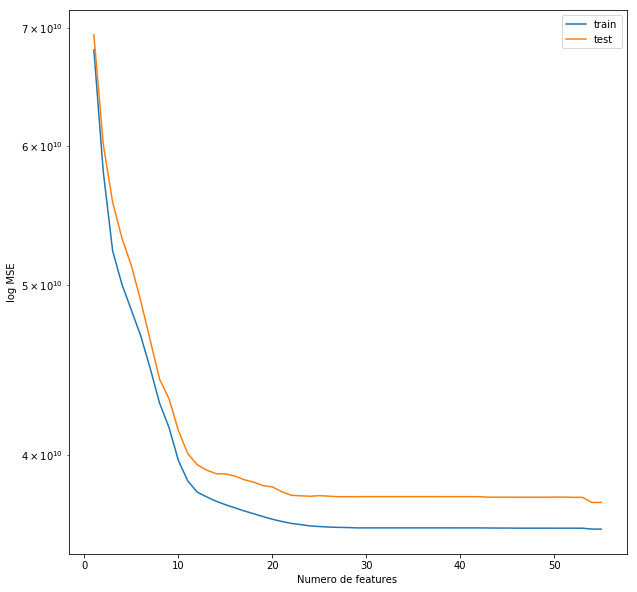

In [27]:
plt.figure(figsize=(10,10))
plt.plot(np.arange(1,len(actuales)+1),tr_error)
plt.plot(np.arange(1,len(actuales)+1),val_error)
plt.legend(["train","test"])
plt.yscale('log')
plt.ylabel('log MSE')
plt.xlabel('Numero de features')
plt.title('curvas de MSE para datos de train y testing')
plt.show()

### R

El mejor modelo fue el que tiene 37 variables,  aunque a partir de las 27 el modelo tanto para train como test, pareciese converger. El por que de esto, puede ser debido a la cantidad de variables categoricas que utilizamos (como por ejemplo el grado, o en su defecto ciertas posiciones segun su zipcode)
